Create a black image
- empty or blank img means all pixel values set to zero

In [1]:
import numpy as np
import cv2
img = np.zeros((512,512,3), np.uint8)
# Check if the image was loaded successfully
assert img is not None, "file could not be read, check with os.path.exists()"

# Display the image
cv2.imshow('Image', img)
cv2.waitKey(0)  # Wait until any key is pressed
cv2.destroyAllWindows()  # Close all OpenCV windows

Reading image

In [2]:
import cv2
# Read the image
img = cv2.imread('../Resources/Photos/cat.jpg')

# Check if the image was loaded successfully
if img is None:
    print("Error: Unable to load image.")
    
#assert img is not None, "file could not be read, check with os.path.exists()"
     
else:
    # Display the image
    cv2.imshow('Image', img)
    cv2.waitKey(0)  # Wait until any key is pressed
    cv2.destroyAllWindows()  # Close all OpenCV windows


converting to grayscale

-   Grayscale images are commonly used in computer vision tasks because they only contain intensity information, making them simpler and computationally less expensive compared to color images.

-   The main reason why grayscale representations are often used for extracting descriptors instead of operating on color images directly is that grayscale simplifies the algorithm and reduces computational requirements. Indeed, color may be of limited benefit in many applications and introducing unnecessary information could increase the amount of training data required to achieve good performance.

In [3]:
gray_img =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imshow("gray",gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

A 1D image is just a line, like you extract a single line out of a 2D gray scale image.25 Jan 2014


smoothing images
- Blur images with various low pass filters
- Apply custom-made filters to images (2D convolution)

2D Convolution ( Image Filtering )

- As in one-dimensional signals, images also can be filtered with various low-pass filters (LPF), high-pass filters (HPF), etc.

- LPF helps in removing noise, blurring images, etc.
- HPF filters help in finding edges in images.

OpenCV provides a function cv.filter2D() to convolve a kernel with an image. As an example, we will try an averaging filter on an image. A 5x5 averaging filter kernel will look like the below:

k=1/25[11111
       11111
       11111
       11111
       11111]

creating ones 

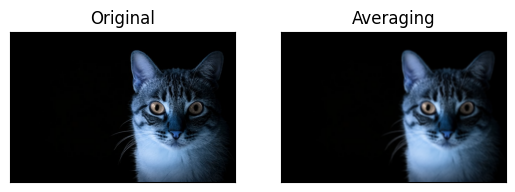

In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

assert img is not None, "file could not be read, check with os.path.exists()"

kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# Blur 
blur = cv2.GaussianBlur(img, (7,7), cv2.BORDER_DEFAULT)
cv2.imshow('Blur', blur)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [ ]:
# Edge Cascade
canny = cv2.Canny(blur, 125, 175)
#cv2.imwrite('Canny_Edges.jpg', canny)
cv2.imshow('edge', canny)



In [ ]:
# Dilating the image
dilated = cv2.dilate(canny, (7,7), iterations=3)
cv2.imwrite("dilated.jpg",dilated)



In [ ]:
# Eroding
eroded = cv2.erode(dilated, (7,7), iterations=3)
cv2.imwrite("erroded.jpg",eroded)



In [7]:
# reading image
img = cv2.imread('../Resources/Photos/cat.jpg')
# get img dim
print(img.shape)
h,w=img.shape[0:2]
print(h,w)


(427, 640, 3)
427 640


In [2]:
# Resize
resized = cv2.resize(img, (400,400), interpolation=cv2.INTER_CUBIC)
cv2.imshow("resized",resized)
cv2.imshow('original image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()



cropping

In [4]:
# Cropping
cropped = img[50:200, 200:300]
cv2.imshow("resized",cropped)
cv2.waitKey(0)
cv2.destroyAllWindows()